  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

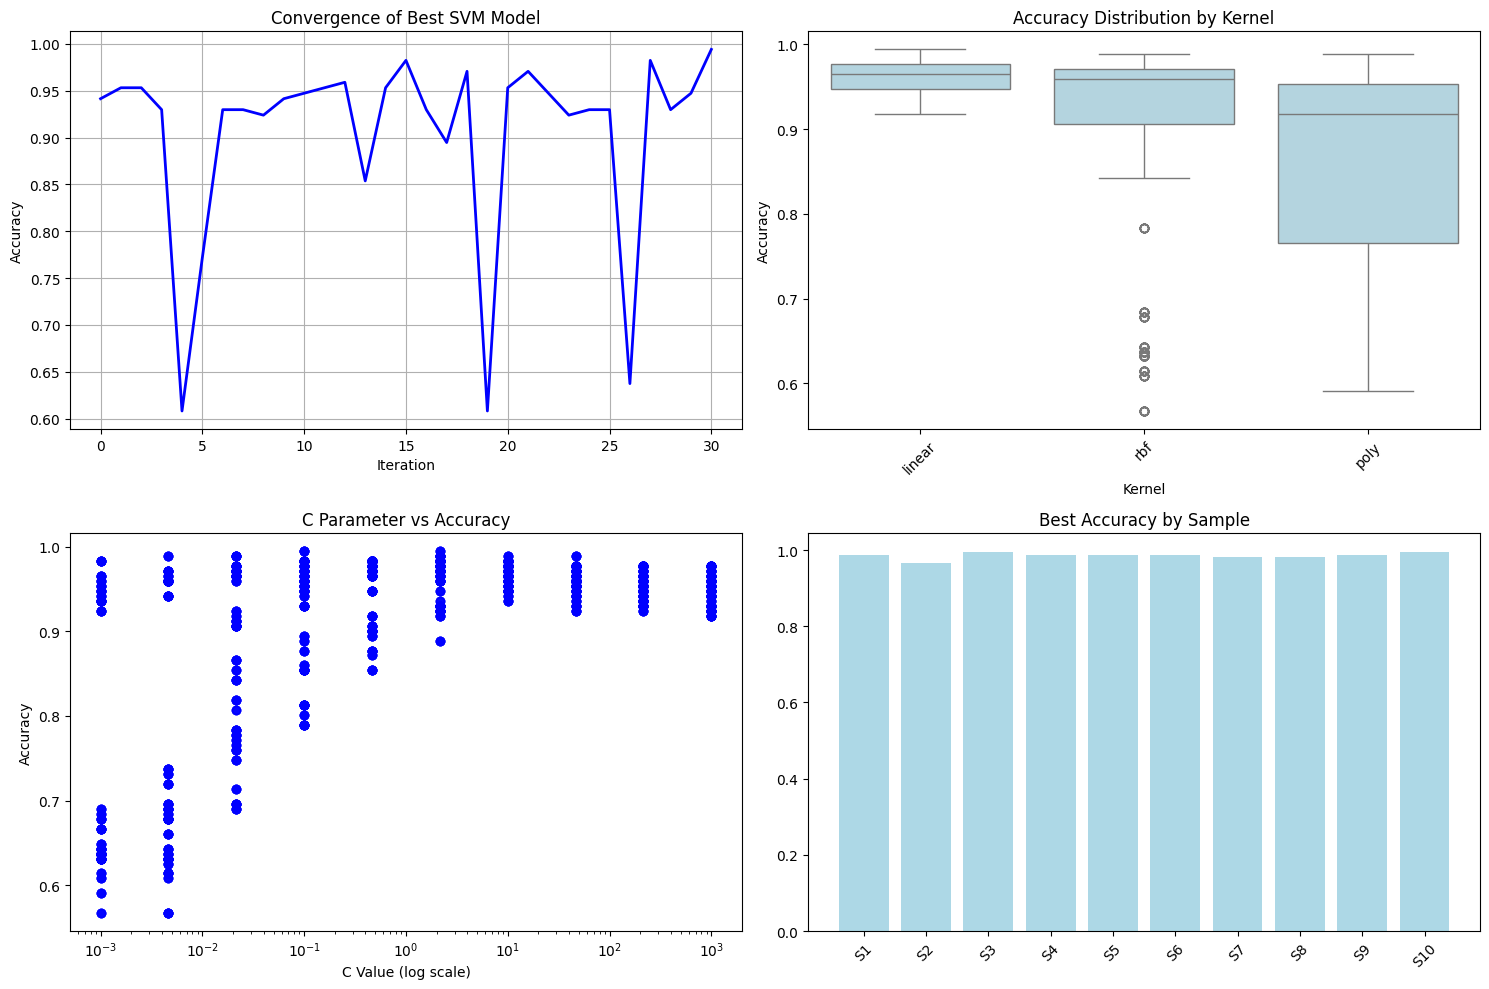


Summary Statistics:
Best Overall Accuracy: 0.994
Best Parameters: {'kernel': 'linear', 'C': 0.1, 'gamma': 0.001}

Accuracy Statistics by Kernel:
         count      mean       std       min       25%       50%       75%  \
Kernel                                                                       
linear  1000.0  0.963047  0.018293  0.918129  0.947368  0.964912  0.976608   
poly    1000.0  0.861930  0.115077  0.590643  0.766082  0.918129  0.953216   
rbf     1000.0  0.892918  0.129808  0.567251  0.906433  0.959064  0.970760   

             max  
Kernel            
linear  0.994152  
poly    0.988304  
rbf     0.988304  


In [2]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.notebook import tqdm

# Load and prepare data
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

kernels = ['linear', 'rbf', 'poly']
C_range = np.logspace(-3, 3, 10)
gamma_range = np.logspace(-3, 3, 10)

results = []
best_accuracy = 0
best_params = None
convergence_data = []
all_accuracies = []  # Store all accuracies for distribution plot

for sample in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=sample)

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    sample_best_acc = 0
    sample_best_params = None
    iteration_accuracies = []

    for iteration in tqdm(range(100)):
        for kernel in kernels:
            C = np.random.choice(C_range)
            gamma = np.random.choice(gamma_range)

            svm = SVC(kernel=kernel, C=C, gamma='auto', random_state=42)
            svm.fit(X_train_scaled, y_train)
            accuracy = svm.score(X_test_scaled, y_test)

            all_accuracies.append({
                'Sample': f'S{sample+1}',
                'Iteration': iteration,
                'Kernel': kernel,
                'Accuracy': accuracy,
                'C': C,
                'Gamma': gamma
            })

            iteration_accuracies.append(accuracy)

            if accuracy > sample_best_acc:
                sample_best_acc = accuracy
                sample_best_params = {'kernel': kernel, 'C': C, 'gamma': gamma}

                if accuracy > best_accuracy:
                    best_accuracy = accuracy
                    best_params = sample_best_params
                    convergence_data = iteration_accuracies.copy()

    results.append({
        'Sample': f'S{sample+1}',
        'Best_Accuracy': round(sample_best_acc, 3),
        'Kernel': sample_best_params['kernel'],
        'C': round(sample_best_params['C'], 3),
        'Gamma': round(sample_best_params['gamma'], 3)
    })

# Create results DataFrame and save to CSV
results_df = pd.DataFrame(results)
results_df.to_csv('svm_results.csv', index=False)

# Create DataFrame for all accuracies
all_accuracies_df = pd.DataFrame(all_accuracies)
all_accuracies_df.to_csv('svm_all_accuracies.csv', index=False)

# Create visualization plots
fig = plt.figure(figsize=(15, 10))

# 1. Convergence Plot
plt.subplot(2, 2, 1)
plt.plot(convergence_data, color='blue', linewidth=2)
plt.title('Convergence of Best SVM Model')
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.grid(True)

# 2. Box Plot of Accuracies by Kernel
plt.subplot(2, 2, 2)
sns.boxplot(data=all_accuracies_df, x='Kernel', y='Accuracy', color='lightblue')
plt.title('Accuracy Distribution by Kernel')
plt.xticks(rotation=45)

# 3. Scatter Plot of C vs Accuracy
plt.subplot(2, 2, 3)
plt.scatter(all_accuracies_df['C'], all_accuracies_df['Accuracy'], alpha=0.5, color='blue')
plt.xscale('log')
plt.title('C Parameter vs Accuracy')
plt.xlabel('C Value (log scale)')
plt.ylabel('Accuracy')

# 4. Sample Performance Comparison
plt.subplot(2, 2, 4)
plt.bar(results_df['Sample'], results_df['Best_Accuracy'], color='lightblue')
plt.title('Best Accuracy by Sample')
plt.xticks(rotation=45)

plt.tight_layout()
plt.savefig('svm_analysis_plots.png', dpi=300, bbox_inches='tight')
plt.show()

# Print summary statistics
print("\nSummary Statistics:")
print(f"Best Overall Accuracy: {best_accuracy:.3f}")
print(f"Best Parameters: {best_params}")
print("\nAccuracy Statistics by Kernel:")
print(all_accuracies_df.groupby('Kernel')['Accuracy'].describe())